# Simulate the Schrodinger-Poisson system with the Spectral method

Based on description and code at https://levelup.gitconnected.com/create-your-own-quantum-mechanics-simulation-with-python-51e215346798



In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def calculate_rho(amp, sigma, rho, xx, yy):
    """ develop the intial rho values """
    rho+= 2*amp*np.exp(-((xx-0.5)**2+(yy-0.5)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
    rho+= 1.5*amp*np.exp(-((xx-0.2)**2+(yy-0.7)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
    rho+= amp*np.exp(-((xx-0.4)**2+(yy-0.6)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
    rho+= amp*np.exp(-((xx-0.6)**2+(yy-0.8)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
    rho+= amp*np.exp(-((xx-0.8)**2+(yy-0.2)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
    rho+= amp*np.exp(-((xx-0.6)**2+(yy-0.7)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
    rho+= amp*np.exp(-((xx-0.7)**2+(yy-0.4)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
    rho+= amp*np.exp(-((xx-0.3)**2+(yy-0.3)**2)/2/sigma**2)/(sigma**3*np.sqrt(2*np.pi)**2)
    return rho


def half_kick(psi, dt, V):
    """ half kick """
    psi = np.exp(-1.j*dt/2.0*V) * psi
    return psi

def calc_V(G, psi, kSq):
    """   """
    Vhat = -np.fft.fftn(4.0*np.pi*G*(np.abs(psi)**2-1.0)) / ( kSq  + (kSq==0))
    V = np.real(np.fft.ifftn(Vhat))
    
    return V

In [17]:
# plotting 
def plot_output(psi):
    """ plot """
    # prep figure
    fig = plt.figure(figsize=(6,4), dpi=80)
    grid = plt.GridSpec(1, 2, wspace=0.0, hspace=0.0)
    ax1 = plt.subplot(grid[0,0])
    ax2 = plt.subplot(grid[0,1])
    
    # make plots
    plt.sca(ax1)
    plt.cla()

    plt.imshow(np.log10(np.abs(psi)**2), cmap = 'inferno')
    plt.clim(-1, 2)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)	
    ax1.set_aspect('equal')	

    plt.sca(ax2)
    plt.cla()
    plt.imshow(np.angle(psi), cmap = 'bwr')
    plt.clim(-np.pi, np.pi)
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)	
    ax2.set_aspect('equal')	
    
    # Save figure
    plt.sca(ax1)
    plt.title(r'$\log_{10}(|\psi|^2)$')
    plt.sca(ax2)
    plt.title(r'${\rm angle}(\psi)$')
    plt.show()
    

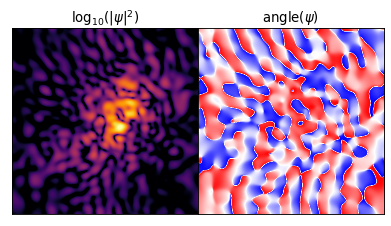

In [19]:
# Simulation parameters
N         = 512    # Spatial resolution
t         = 0      # current time of the simulation
tEnd      = 0.03    # time at which simulation ends
dt        = 0.0001  # timestep

G         = 4000  # Gravitaitonal constant


# Domain [0,1] x [0,1]
L = 1    
xlin = np.linspace(0,L, num=N+1)  # Note: x=0 & x=1 are the same point!
xlin = xlin[0:N]                     # chop off periodic point
xx, yy = np.meshgrid(xlin, xlin)

# Intial Condition
amp = 0.01
sigma = 0.03
rho_start = 0.9
rho = calculate_rho(amp, sigma, rho_start, xx, yy)

# normalize wavefunction to <|psi|^2>=1
rhobar = np.mean( rho )
rho /= rhobar
psi = np.sqrt(rho)

# Fourier Space Variables
klin = 2.0 * np.pi / L * np.arange(-N/2, N/2)
kx, ky = np.meshgrid(klin, klin)
kx = np.fft.ifftshift(kx)
ky = np.fft.ifftshift(ky)
kSq = kx**2 + ky**2

# Potential
V = calc_V(G, psi, kSq)

# number of timesteps
Nt = int(np.ceil(tEnd/dt))


# Simulation Main Loop
for i in range(Nt):
    # (1/2) kick
    psi = half_kick(psi, dt, V)
    # drift
    psihat = np.fft.fftn(psi)
    psihat = np.exp(dt * (-1.j*kSq/2.))  * psihat
    psi = np.fft.ifftn(psihat)

    # update potential
    V = calc_V(G, psi, kSq)

    # (1/2) kick
    psi = half_kick(psi, dt, V)

    # update time
    t += dt

plot_output(psi)
